In [1]:
## increased volatility to 0.4 & increased sharpe ratio to 0.5

In [2]:
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from pandas_datareader import data
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import norm
import pyfolio as pf
%matplotlib inline

/opt/anaconda3/lib/python3.8/site-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [3]:
import csv
df = pd.read_csv('../../Final_stock_data_V2.csv')
df

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,beta,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y
0,AAP,Advance Auto Parts Inc.,Consumer Cyclical,Increase,Above Fair Price,UnderValued,Sustainable,214.1500,0.103398,1.308405e+10,...,1.25,9.550,0.1525,13.932986,22.424082,109.188247,12.97,0.171149,0.355467,0.049267
1,ABT,Abbott Laboratories,Healthcare,Increase,Above Fair Price,OverValued,Average,118.2900,0.181179,2.091710e+11,...,0.74,3.940,0.1318,22.924420,30.022842,51.234756,25.96,0.109154,0.249769,0.247649
2,ACN,Accenture plc,Technology,Increase,Above Fair Price,OverValued,Sustainable,323.9050,0.208836,2.047083e+11,...,1.21,9.613,0.1135,31.025385,33.694477,121.148794,9.45,0.166287,0.254874,0.245322
3,ADM,Archer-Daniels-Midland Company,Consumer Defensive,Increase,Above Fair Price,OverValued,Not Sustainable,76.9850,0.122815,4.327843e+10,...,0.81,4.790,0.0660,14.804809,16.072025,19.449588,36.42,0.117663,0.252289,0.150693
4,ADP,"Automatic Data Processing, Inc.",Industrials,Increase,Above Fair Price,OverValued,Sustainable,201.0100,0.182708,8.443324e+10,...,0.83,6.460,0.1371,26.483530,31.116098,90.801919,14.18,0.120094,0.272415,0.178939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933,XRX,Xerox Holdings Corporation,Technology,Increase,Above Fair Price,UnderValued,No Data,20.6059,0.029031,3.678401e+09,...,1.75,1.459,-0.1600,10.302950,14.123303,0.609810,999.00,0.231929,0.405374,-0.032851
934,ZD,"Ziff Davis, Inc.",Communication Services,Increase,Above Fair Price,OverValued,No Data,102.4800,0.145864,4.941668e+09,...,1.01,4.120,0.1140,14.193907,24.873789,38.485339,999.00,0.141975,0.308007,0.055993
935,ZUMZ,Zumiez Inc.,Consumer Cyclical,Decrease,Above Fair Price,UnderValued,No Data,42.6600,0.035214,9.777245e+08,...,1.68,4.870,0.1500,9.233767,8.759754,21.330001,999.00,0.223419,0.513665,0.157523
936,ESNT,Essent Group Ltd.,Financial Services,Increase,Above Fair Price,UnderValued,No Data,44.4800,0.082041,4.912015e+09,...,1.33,5.569,0.1555,7.339934,7.987071,23.215807,999.00,0.180874,0.502764,0.045034


<AxesSubplot:>

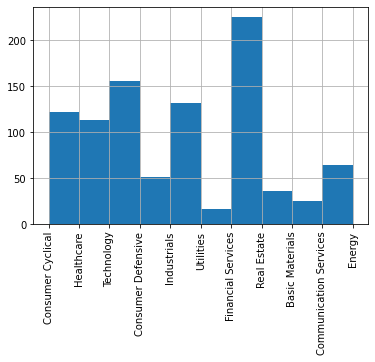

In [4]:
df['sector'].hist(xrot=90)

## Filter based on 2/3 criteria

In [5]:
def check_criteria(each):
    check = []
    if each["capm_status"] == "UnderValued":
        check.append(True)
    if each["Earnings_expectation"] == "Increase":
        check.append(True)
    if each["irv_status"] == "Below Fair Price":
        check.append(True)
    return check

In [6]:
def check_number(criteria):
    if len(criteria) >= 2:
        return True
    else:
        return False

In [7]:
rows = []
for i in range(938):
    each = df.iloc[i]
    criteria = check_criteria(each)
    result = check_number(criteria)
    if result:
        rows.append(i)

In [8]:
len(rows)

476

In [9]:
df = df.iloc[rows]
df

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,beta,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y
0,AAP,Advance Auto Parts Inc.,Consumer Cyclical,Increase,Above Fair Price,UnderValued,Sustainable,214.1500,0.103398,1.308405e+10,...,1.25,9.550,0.1525,13.932986,22.424082,109.188247,12.97,0.171149,0.355467,0.049267
5,ADSK,"Autodesk, Inc.",Technology,Increase,Below Fair Price,UnderValued,Sustainable,217.3800,0.190997,4.781773e+10,...,1.43,5.928,0.2883,31.967648,36.670040,302.038344,15.45,0.193030,0.384894,0.209161
11,ALK,"Alaska Air Group, Inc.",Industrials,Increase,Above Fair Price,UnderValued,No Data,58.9750,0.141697,7.425660e+09,...,1.55,3.770,-0.2340,9.073076,15.643236,0.761055,999.00,0.207617,0.454054,-0.086043
12,ALLE,Allegion plc,Industrials,Increase,Above Fair Price,UnderValued,Average,114.1447,0.097180,1.023831e+10,...,1.14,5.086,0.0777,19.955368,22.442923,31.814578,23.59,0.157777,0.279213,0.118004
14,AMD,"Advanced Micro Devices, Inc.",Technology,Increase,Below Fair Price,OverValued,No Data,117.1100,0.319034,1.414232e+11,...,1.95,3.242,0.3532,35.062874,36.122765,253.245268,999.00,0.256240,0.564107,0.569607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,XOMA,XOMA Corporation,Healthcare,Increase,Above Fair Price,UnderValued,No Data,20.7600,-0.034853,2.348205e+08,...,0.81,0.082,0.1900,-90.260870,253.170730,14.120154,999.00,0.117663,0.689078,0.371572
932,XP,XP Inc.,Financial Services,Increase,Above Fair Price,UnderValued,No Data,34.1100,-0.001020,1.908622e+10,...,1.91,0.986,0.0478,27.508064,34.594322,7.380346,999.00,0.251378,NaN,NaN
933,XRX,Xerox Holdings Corporation,Technology,Increase,Above Fair Price,UnderValued,No Data,20.6059,0.029031,3.678401e+09,...,1.75,1.459,-0.1600,10.302950,14.123303,0.609810,999.00,0.231929,0.405374,-0.032851
936,ESNT,Essent Group Ltd.,Financial Services,Increase,Above Fair Price,UnderValued,No Data,44.4800,0.082041,4.912015e+09,...,1.33,5.569,0.1555,7.339934,7.987071,23.215807,999.00,0.180874,0.502764,0.045034


## Filter stocks on Volatility

In [10]:
df = df[df["AHV_5y"] < 0.4]

In [11]:
df

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,beta,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y
0,AAP,Advance Auto Parts Inc.,Consumer Cyclical,Increase,Above Fair Price,UnderValued,Sustainable,214.1500,0.103398,1.308405e+10,...,1.25,9.550,0.1525,13.932986,22.424082,109.188247,12.97,0.171149,0.355467,0.049267
5,ADSK,"Autodesk, Inc.",Technology,Increase,Below Fair Price,UnderValued,Sustainable,217.3800,0.190997,4.781773e+10,...,1.43,5.928,0.2883,31.967648,36.670040,302.038344,15.45,0.193030,0.384894,0.209161
12,ALLE,Allegion plc,Industrials,Increase,Above Fair Price,UnderValued,Average,114.1447,0.097180,1.023831e+10,...,1.14,5.086,0.0777,19.955368,22.442923,31.814578,23.59,0.157777,0.279213,0.118004
15,AME,"AMETEK, Inc.",Industrials,Increase,Above Fair Price,UnderValued,Average,128.2800,0.155568,2.967437e+10,...,1.31,3.990,-0.0120,23.799630,32.150375,16.355389,25.95,0.178443,0.269622,0.206944
17,ANSS,"ANSYS, Inc.",Technology,Increase,Above Fair Price,UnderValued,Sustainable,305.4575,0.163292,2.665208e+10,...,1.24,5.318,0.1118,38.470715,57.438416,112.688671,13.16,0.169933,0.316793,0.271663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,TWNK,"Hostess Brands, Inc.",Consumer Defensive,Increase,Above Fair Price,UnderValued,No Data,21.1800,0.082395,2.930825e+09,...,0.69,0.626,0.1008,22.531916,33.833866,7.144818,999.00,0.103076,0.279978,0.076044
915,VLY,Valley National Bancorp,Financial Services,Increase,Above Fair Price,UnderValued,No Data,13.9850,0.063284,5.691251e+09,...,1.21,1.110,0.0500,11.654166,12.599098,3.083582,999.00,0.166287,0.360308,0.060302
922,WAFD,"Washington Federal, Inc.",Financial Services,Increase,Above Fair Price,UnderValued,No Data,35.9200,0.109876,2.342835e+09,...,0.85,2.390,0.0700,11.777049,15.029287,9.385982,999.00,0.122525,0.323025,0.026584
923,WDAY,"Workday, Inc.",Technology,Increase,Above Fair Price,UnderValued,Sustainable,216.5600,0.160951,5.414000e+10,...,1.35,0.117,0.1579,60.831463,1850.940200,115.161464,13.09,0.183305,0.383779,0.213788


In [12]:
#total number of stocks for each sector 

df["sector"].value_counts()

Industrials               36
Financial Services        36
Technology                29
Consumer Cyclical         20
Healthcare                16
Consumer Defensive        12
Communication Services     8
Basic Materials            7
Real Estate                5
Energy                     1
Utilities                  1
Name: sector, dtype: int64

In [13]:
#df for each sector

df_BM = df.loc[df['sector'] == 'Basic Materials']
df_CS = df.loc[df['sector'] == 'Communication Services']
df_CC = df.loc[df['sector'] == 'Consumer Cyclical']
df_CD = df.loc[df['sector'] == 'Consumer Defensive']
df_energy = df.loc[df['sector'] == 'Energy']
df_FS = df.loc[df['sector'] == 'Financial Services']
df_healthcare = df.loc[df['sector'] == 'Healthcare']
df_industrials = df.loc[df['sector'] == 'Industrials']
df_RE = df.loc[df['sector'] == 'Real Estate']
df_tech = df.loc[df['sector'] == 'Technology']
df_utilities = df.loc[df['sector'] == 'Utilities']

## Helper Functions

In [14]:
def get_closeprice(ticker):    
    start_date = str(date.today().year - 5) +'-0'+ str(date.today().month) +'-'+ str(date.today().day)
    end_date = str(date.today())
    
    panel_data = data.DataReader([ticker],'yahoo', start_date, end_date)
    closes = panel_data[["Close", "Adj Close"]]
    
    return closes

In [15]:
def get_sharpe_ratio(ticker):
    
    closes = get_closeprice(ticker)
    adj_close = closes["Adj Close"]
    
    risk_free_ann_ret_rate = 0.0195  #assuming this rate based on the latest data
     
    #Rp
    returns_ts = adj_close.pct_change().dropna()
    
    #Average Rp
    avg_daily_ret = returns_ts.mean()

    #Average risk-free rate for the year (Annual rate / number of trading days to spread it out)
    returns_ts['RiskFree_Rate'] = risk_free_ann_ret_rate/252

    #Average Rf
    avg_rf_ret = returns_ts['RiskFree_Rate'].mean()

    #calculate sharpe ratio

    #Add the excess return columns for each ETF: Rp - Rf
    returns_ts['Excess_ret'] = returns_ts[ticker] - returns_ts['RiskFree_Rate']
    
    sharpe = ((avg_daily_ret[ticker] - avg_rf_ret) /returns_ts['Excess_ret'].std())*np.sqrt(252)

    return sharpe.round(3)

In [16]:
def get_return_series(ticker):
    closes = get_closeprice(ticker)
    return_series_close = (closes['Close'].pct_change()+ 1).cumprod() - 1
    return return_series_close

# Basic Materials

## Filtering Stocks based on Sharpe Ratio

In [17]:
sharpe_list = []
for i in range(len(df_BM)):
    each = df_BM.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

In [18]:
sharpe_list

[0.465, 0.158, 0.429, 0.723, 0.297, 0.453, 0.36]

In [19]:
df_BM["sharpe"] = sharpe_list
df_BM

/var/folders/pk/mh54kmcs083ggkf50q9s_r1c0000gn/T/ipykernel_7661/295372314.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_BM["sharpe"] = sharpe_list


,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
42,CE,Celanese Corporation Celanese C,Basic Materials,Decrease,Below Fair Price,UnderValued,Not Sustainable,142.86,0.133471,1.555331e+10,...,24.792,0.2942,9.058972,5.762343,206.829589,30.53,0.173580,0.326016,0.120412,0.465
103,IFF,International Flavors & Fragran,Basic Materials,Increase,Above Fair Price,UnderValued,Average,134.77,0.111741,3.430530e+10,...,1.167,0.0449,25.476372,115.484146,28.441679,22.82,0.145622,0.293892,0.051737,0.158
129,LYB,LyondellBasell Industries NV,Basic Materials,Decrease,Below Fair Price,UnderValued,Average,100.59,0.160340,3.347474e+10,...,17.121,0.4701,6.613412,5.875241,458.528308,24.89,0.197892,0.398685,0.086687,0.429
157,NUE,Nucor Corporation,Basic Materials,Increase,Below Fair Price,UnderValued,Not Sustainable,122.64,0.142526,3.505039e+10,...,16.577,0.3499,7.334929,7.398202,259.439419,36.58,0.194245,0.360322,0.193174,0.723
170,PPG,"PPG Industries, Inc.",Basic Materials,Increase,Above Fair Price,UnderValued,Average,146.96,0.140960,3.488845e+10,...,5.951,0.1660,17.878345,24.695010,83.210006,24.51,0.158993,0.273559,0.082631,0.297
271,BCPC,Balchem Corporation,Basic Materials,Increase,Below Fair Price,OverValued,No Data,139.99,0.152557,4.533101e+09,...,2.860,0.2400,33.410503,48.947556,137.905521,999.00,0.094567,0.285427,0.108634,0.453
557,IOSP,Innospec Inc.,Basic Materials,Increase,Above Fair Price,UnderValued,No Data,97.45,0.143631,2.401889e+09,...,3.688,0.0750,18.849129,26.423534,26.555069,999.00,0.183305,0.351408,0.076989,0.360


In [20]:
df_BM = df_BM[df_BM["sharpe"] > 0.3]
df_BM

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
42,CE,Celanese Corporation Celanese C,Basic Materials,Decrease,Below Fair Price,UnderValued,Not Sustainable,142.86,0.133471,1.555331e+10,...,24.792,0.2942,9.058972,5.762343,206.829589,30.53,0.173580,0.326016,0.120412,0.465
129,LYB,LyondellBasell Industries NV,Basic Materials,Decrease,Below Fair Price,UnderValued,Average,100.59,0.160340,3.347474e+10,...,17.121,0.4701,6.613412,5.875241,458.528308,24.89,0.197892,0.398685,0.086687,0.429
157,NUE,Nucor Corporation,Basic Materials,Increase,Below Fair Price,UnderValued,Not Sustainable,122.64,0.142526,3.505039e+10,...,16.577,0.3499,7.334929,7.398202,259.439419,36.58,0.194245,0.360322,0.193174,0.723
271,BCPC,Balchem Corporation,Basic Materials,Increase,Below Fair Price,OverValued,No Data,139.99,0.152557,4.533101e+09,...,2.860,0.2400,33.410503,48.947556,137.905521,999.00,0.094567,0.285427,0.108634,0.453
557,IOSP,Innospec Inc.,Basic Materials,Increase,Above Fair Price,UnderValued,No Data,97.45,0.143631,2.401889e+09,...,3.688,0.0750,18.849129,26.423534,26.555069,999.00,0.183305,0.351408,0.076989,0.360


# Consumer Defensive

## Filtering Stocks based on Sharpe Ratio

In [21]:
sharpe_list = []
for i in range(len(df_CD)):
    each = df_CD.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

In [22]:
sharpe_list

[0.05,
 0.157,
 0.086,
 -0.299,
 0.457,
 0.342,
 0.076,
 0.295,
 0.296,
 0.043,
 0.122,
 0.297]

In [23]:
df_CD["sharpe"] = sharpe_list
df_CD

/var/folders/pk/mh54kmcs083ggkf50q9s_r1c0000gn/T/ipykernel_7661/4153434586.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CD["sharpe"] = sharpe_list


,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
36,CAG,"ConAgra Brands, Inc.",Consumer Defensive,Increase,Above Fair Price,UnderValued,Not Sustainable,35.70,0.090652,1.712493e+10,...,2.481,0.0224,13.522727,14.389359,6.193629,32.92,0.115232,0.287178,0.000833,0.050
46,CL,Colgate-Palmolive Company,Consumer Defensive,Increase,Above Fair Price,UnderValued,Average,79.09,0.078620,6.666093e+10,...,3.140,0.0612,23.330381,25.187897,19.186076,22.12,0.094567,0.206239,0.051918,0.157
117,K,Kellogg Company,Consumer Defensive,Increase,Above Fair Price,UnderValued,Average,66.39,0.056187,2.264716e+10,...,3.668,0.0315,15.959135,18.099781,12.474271,26.78,0.090920,0.233473,0.006971,0.086
119,KHC,The Kraft Heinz Company,Consumer Defensive,Increase,Above Fair Price,UnderValued,Not Sustainable,39.79,-0.035146,4.870455e+10,...,1.858,-0.0244,15.071969,21.415500,4.528032,34.47,0.150484,0.322340,-0.118555,-0.299
191,SYY,Sysco Corporation,Consumer Defensive,Increase,Below Fair Price,UnderValued,Sustainable,84.05,0.143456,4.308874e+10,...,1.332,0.5309,19.964370,63.100600,551.757903,12.14,0.182089,0.361481,0.130098,0.457
306,CCEP,Coca-Cola Europacific Partners,Consumer Defensive,Increase,Below Fair Price,OverValued,No Data,54.09,0.128504,2.491753e+10,...,1.515,0.3135,20.258427,35.702972,89.469938,999.00,0.109154,0.295493,0.110419,0.342
500,HAIN,"The Hain Celestial Group, Inc.",Consumer Defensive,Increase,Above Fair Price,UnderValued,No Data,36.00,0.058080,3.343734e+09,...,0.962,0.1300,19.459460,37.422035,15.370851,999.00,0.099429,0.344834,-0.020295,0.076
609,LOPE,"Grand Canyon Education, Inc.",Consumer Defensive,Increase,Below Fair Price,OverValued,No Data,86.29,0.170795,3.457951e+09,...,5.729,0.9000,13.588977,15.061965,3957.603724,999.00,0.075117,0.335656,0.079754,0.295
754,PRDO,Perdoceo Education Corporation,Consumer Defensive,Increase,Above Fair Price,UnderValued,No Data,10.11,-0.012971,7.087666e+08,...,1.569,0.1500,5.877907,6.443594,5.055000,999.00,0.160209,0.393648,0.007507,0.296
761,PSMT,"PriceSmart, Inc.",Consumer Defensive,Increase,Above Fair Price,UnderValued,No Data,70.56,0.011350,2.177658e+09,...,3.180,0.1500,17.465345,22.188679,35.280000,999.00,0.123741,0.322618,-0.031776,0.043


In [24]:
df_CD = df_CD[df_CD["sharpe"] > 0.3]
df_CD

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
191,SYY,Sysco Corporation,Consumer Defensive,Increase,Below Fair Price,UnderValued,Sustainable,84.05,0.143456,4.308874e+10,...,1.332,0.5309,19.964370,63.100600,551.757903,12.14,0.182089,0.361481,0.130098,0.457
306,CCEP,Coca-Cola Europacific Partners,Consumer Defensive,Increase,Below Fair Price,OverValued,No Data,54.09,0.128504,2.491753e+10,...,1.515,0.3135,20.258427,35.702972,89.469938,999.00,0.109154,0.295493,0.110419,0.342


# Real Estate Sector

## Filtering Stocks based on Sharpe Ratio

In [25]:
sharpe_list = []
for i in range(len(df_RE)):
    each = df_RE.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

In [26]:
sharpe_list

[0.194, 0.679, 0.599, 0.86, 0.387]

In [27]:
df_RE["sharpe"] = sharpe_list
df_RE

/var/folders/pk/mh54kmcs083ggkf50q9s_r1c0000gn/T/ipykernel_7661/483777690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_RE["sharpe"] = sharpe_list


,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
35,BXP,"Boston Properties, Inc.",Real Estate,Increase,Above Fair Price,UnderValued,Sustainable,121.005,0.052115,1.890183e+10,...,2.044,0.0700,39.673770,59.200100,31.618901,13.57,0.160209,0.318134,0.015426,0.194
39,CBRE,CBRE Group Inc,Real Estate,Increase,Above Fair Price,UnderValued,Sustainable,99.530,0.182808,3.330930e+10,...,4.290,0.1100,17.647163,23.200466,36.186806,6.99,0.189383,0.351216,0.244065,0.679
74,EQIX,"Equinix, Inc.",Real Estate,Increase,Below Fair Price,OverValued,Sustainable,681.020,0.198920,6.131986e+10,...,4.743,0.3700,88.100910,143.584230,1645.638404,14.71,0.062961,0.272286,0.148163,0.599
184,SBAC,SBA Communications Corporation,Real Estate,Increase,Below Fair Price,OverValued,Sustainable,297.160,0.204253,3.232536e+10,...,2.606,1.8932,74.663315,114.029170,599909.754404,14.52,0.056883,0.267604,0.237268,0.860
485,GOOD,Gladstone Commercial Corporatio,Real Estate,Increase,Above Fair Price,UnderValued,No Data,21.090,0.095257,7.859906e+08,...,0.029,0.0600,-2109.000000,727.241400,5.064293,999.00,0.140759,0.386789,0.084844,0.387


In [28]:
df_RE = df_RE[df_RE["sharpe"] > 0.3]
df_RE

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
39,CBRE,CBRE Group Inc,Real Estate,Increase,Above Fair Price,UnderValued,Sustainable,99.53,0.182808,3.330930e+10,...,4.290,0.1100,17.647163,23.200466,36.186806,6.99,0.189383,0.351216,0.244065,0.679
74,EQIX,"Equinix, Inc.",Real Estate,Increase,Below Fair Price,OverValued,Sustainable,681.02,0.198920,6.131986e+10,...,4.743,0.3700,88.100910,143.584230,1645.638404,14.71,0.062961,0.272286,0.148163,0.599
184,SBAC,SBA Communications Corporation,Real Estate,Increase,Below Fair Price,OverValued,Sustainable,297.16,0.204253,3.232536e+10,...,2.606,1.8932,74.663315,114.029170,599909.754404,14.52,0.056883,0.267604,0.237268,0.860
485,GOOD,Gladstone Commercial Corporatio,Real Estate,Increase,Above Fair Price,UnderValued,No Data,21.09,0.095257,7.859906e+08,...,0.029,0.0600,-2109.000000,727.241400,5.064293,999.00,0.140759,0.386789,0.084844,0.387


# Financial Services

## Filtering Stocks based on Sharpe Ratio

In [29]:
sharpe_list = []
for i in range(len(df_FS)):
    each = df_FS.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

In [30]:
sharpe_list

[0.654,
 0.04,
 0.215,
 0.409,
 0.466,
 0.377,
 0.306,
 0.329,
 0.468,
 0.364,
 0.722,
 0.14,
 0.043,
 0.233,
 0.101,
 0.077,
 0.878,
 0.462,
 0.239,
 0.42,
 0.362,
 0.147,
 0.261,
 -0.497,
 0.151,
 0.132,
 0.258,
 0.071,
 0.151,
 0.006,
 0.224,
 0.257,
 0.253,
 0.498,
 0.299,
 0.183]

In [31]:
df_FS["sharpe"] = sharpe_list
df_FS

/var/folders/pk/mh54kmcs083ggkf50q9s_r1c0000gn/T/ipykernel_7661/3122362208.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_FS["sharpe"] = sharpe_list


,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
26,AXP,American Express Company,Financial Services,Increase,Below Fair Price,UnderValued,Not Sustainable,195.110,0.155990,1.511236e+11,...,9.573,0.4330,20.176836,20.381280,706.617956,20.34,0.169933,0.343000,0.210121,0.654
28,BEN,"Franklin Resources, Inc.",Financial Services,Increase,Above Fair Price,UnderValued,Sustainable,29.930,0.009948,1.501872e+10,...,3.570,0.0949,7.876316,8.383754,9.619805,19.51,0.165071,0.345803,-0.016066,0.040
31,BK,The Bank of New York Mellon Cor,Financial Services,Increase,Above Fair Price,UnderValued,Average,55.740,0.123563,4.603126e+10,...,3.925,0.1356,12.196937,14.201275,24.881978,22.79,0.158993,0.298729,0.053724,0.215
51,COF,Capital One Financial Corporati,Financial Services,Decrease,Below Fair Price,UnderValued,Average,153.680,0.140197,6.540959e+10,...,26.739,0.4520,7.958571,5.747410,626.622996,23.22,0.219773,0.398322,0.129511,0.409
136,MET,"MetLife, Inc.",Financial Services,Increase,Above Fair Price,UnderValued,Sustainable,69.590,0.109501,5.853632e+10,...,5.992,0.0835,9.665278,11.613817,20.356189,14.74,0.172365,0.338744,0.114839,0.466
156,NTRS,Northern Trust Corporation,Financial Services,Increase,Above Fair Price,UnderValued,Average,118.050,0.129134,2.451438e+10,...,6.340,0.1866,15.553360,18.619873,78.251831,24.39,0.160209,0.317205,0.083843,0.377
162,PBCT,People's,Financial Services,Increase,Above Fair Price,UnderValued,Average,21.010,0.099441,8.992805e+09,...,0.702,0.1074,19.275229,29.928774,7.479217,23.64,0.139544,0.359543,0.052798,0.306
165,PFG,Principal Financial Group Inc,Financial Services,Increase,Above Fair Price,UnderValued,Sustainable,71.680,0.134755,1.900015e+10,...,6.220,0.1647,10.240000,11.524116,40.180390,17.00,0.213695,0.368267,0.065865,0.329
169,PNC,"PNC Financial Services Group, I",Financial Services,Increase,Above Fair Price,UnderValued,Average,204.410,0.161210,8.639205e+10,...,10.173,-0.0426,14.497163,20.093384,19.635067,22.64,0.182089,0.324564,0.131015,0.468
193,TFC,Truist Financial Corporation,Financial Services,Increase,Above Fair Price,UnderValued,No Data,62.230,0.110499,8.307021e+10,...,4.238,0.0460,12.804526,14.683813,13.257890,999.00,0.173580,0.360569,0.086008,0.364


In [32]:
df_FS = df_FS[df_FS["sharpe"] > 0.3]
df_FS

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
26,AXP,American Express Company,Financial Services,Increase,Below Fair Price,UnderValued,Not Sustainable,195.11,0.155990,1.511236e+11,...,9.573,0.4330,20.176836,20.381280,706.617956,20.34,0.169933,0.343000,0.210121,0.654
51,COF,Capital One Financial Corporati,Financial Services,Decrease,Below Fair Price,UnderValued,Average,153.68,0.140197,6.540959e+10,...,26.739,0.4520,7.958571,5.747410,626.622996,23.22,0.219773,0.398322,0.129511,0.409
136,MET,"MetLife, Inc.",Financial Services,Increase,Above Fair Price,UnderValued,Sustainable,69.59,0.109501,5.853632e+10,...,5.992,0.0835,9.665278,11.613817,20.356189,14.74,0.172365,0.338744,0.114839,0.466
156,NTRS,Northern Trust Corporation,Financial Services,Increase,Above Fair Price,UnderValued,Average,118.05,0.129134,2.451438e+10,...,6.340,0.1866,15.553360,18.619873,78.251831,24.39,0.160209,0.317205,0.083843,0.377
162,PBCT,People's,Financial Services,Increase,Above Fair Price,UnderValued,Average,21.01,0.099441,8.992805e+09,...,0.702,0.1074,19.275229,29.928774,7.479217,23.64,0.139544,0.359543,0.052798,0.306
165,PFG,Principal Financial Group Inc,Financial Services,Increase,Above Fair Price,UnderValued,Sustainable,71.68,0.134755,1.900015e+10,...,6.220,0.1647,10.240000,11.524116,40.180390,17.00,0.213695,0.368267,0.065865,0.329
169,PNC,"PNC Financial Services Group, I",Financial Services,Increase,Above Fair Price,UnderValued,Average,204.41,0.161210,8.639205e+10,...,10.173,-0.0426,14.497163,20.093384,19.635067,22.64,0.182089,0.324564,0.131015,0.468
193,TFC,Truist Financial Corporation,Financial Services,Increase,Above Fair Price,UnderValued,No Data,62.23,0.110499,8.307021e+10,...,4.238,0.0460,12.804526,14.683813,13.257890,999.00,0.173580,0.360569,0.086008,0.364
197,TROW,"T. Rowe Price Group, Inc.",Financial Services,Increase,Above Fair Price,UnderValued,Sustainable,142.56,0.120724,3.267447e+10,...,13.270,0.1220,10.678651,10.743029,57.098253,16.74,0.167502,0.300412,0.193441,0.722
317,CG,The Carlyle Group Inc.,Financial Services,Decrease,Below Fair Price,UnderValued,No Data,44.83,0.139004,1.598019e+10,...,7.730,0.2826,11.041873,5.799483,59.852092,999.00,0.193030,0.363420,0.276296,0.878


# Consumer Cyclical Sector

## Filtering Stocks based on Sharpe Ratio

In [33]:
sharpe_list = []
for i in range(len(df_CC)):
    each = df_CC.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

In [34]:
sharpe_list

[0.336,
 0.614,
 0.437,
 0.401,
 0.093,
 0.72,
 0.494,
 0.485,
 0.333,
 0.258,
 0.183,
 0.901,
 0.408,
 0.17,
 0.357,
 1.179,
 0.118,
 0.64,
 0.497,
 0.469]

In [35]:
df_CC["sharpe"] = sharpe_list
df_CC

/var/folders/pk/mh54kmcs083ggkf50q9s_r1c0000gn/T/ipykernel_7661/3842492468.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CC["sharpe"] = sharpe_list


,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
0,AAP,Advance Auto Parts Inc.,Consumer Cyclical,Increase,Above Fair Price,UnderValued,Sustainable,214.1500,0.103398,1.308405e+10,...,9.550,0.1525,13.932986,22.424082,1.091882e+02,12.97,0.171149,0.355467,0.049267,0.336
65,DHI,"D.R. Horton, Inc.",Consumer Cyclical,Increase,Above Fair Price,UnderValued,Average,81.3366,0.204622,2.897055e+10,...,11.410,0.1060,5.326562,7.128537,2.862672e+01,22.55,0.217341,0.370627,0.238886,0.614
80,F,Ford Motor Company,Consumer Cyclical,Increase,Below Fair Price,UnderValued,Average,17.4300,0.074129,6.965446e+10,...,0.713,0.7767,8.758794,24.446003,4.370325e+02,29.57,0.150484,0.375582,0.108521,0.437
91,GPC,Genuine Parts Company,Consumer Cyclical,Increase,Above Fair Price,UnderValued,Sustainable,124.8900,0.103717,1.778708e+10,...,5.609,0.0460,17.202478,22.266000,2.660739e+01,12.53,0.150484,0.294242,0.076618,0.401
93,HAS,"Hasbro, Inc.",Consumer Cyclical,Increase,Above Fair Price,UnderValued,Sustainable,95.7150,0.136486,1.320360e+10,...,3.278,0.1770,17.857275,29.199205,5.897359e+01,10.44,0.143190,0.352387,0.050021,0.093
98,HLT,Hilton Worldwide Holdings Inc.,Consumer Cyclical,Increase,Below Fair Price,UnderValued,Sustainable,147.9550,0.134492,4.123831e+10,...,0.140,2.7265,34.408140,1056.821400,2.914266e+06,19.95,0.168718,0.314619,0.209851,0.720
130,MAR,Marriott International,Consumer Cyclical,Increase,Below Fair Price,UnderValued,Average,172.6300,0.188316,5.622266e+10,...,1.428,2.3223,32.449250,120.889360,1.209916e+06,22.08,0.231929,0.372085,0.155653,0.494
166,PHM,"PulteGroup, Inc.",Consumer Cyclical,Increase,Below Fair Price,OverValued,Average,46.5600,0.196675,1.178834e+10,...,6.465,0.2370,5.088525,7.201856,4.487761e+01,21.06,0.193030,0.391428,0.183855,0.485
182,ROST,"Ross Stores, Inc.",Consumer Cyclical,Increase,Below Fair Price,UnderValued,Sustainable,93.0700,0.144106,3.288442e+10,...,4.465,0.9374,17.363806,20.844343,5.087129e+03,16.14,0.144406,0.347761,0.073798,0.333
208,VFC,V.F. Corporation,Consumer Cyclical,Increase,Below Fair Price,UnderValued,Sustainable,58.3200,0.080890,2.290705e+10,...,3.120,0.4574,15.677419,18.692308,2.458758e+02,12.73,0.199108,0.349883,0.071379,0.258


In [36]:
df_CC = df_CC[df_CC["sharpe"] > 0.3]
df_CC

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
0,AAP,Advance Auto Parts Inc.,Consumer Cyclical,Increase,Above Fair Price,UnderValued,Sustainable,214.1500,0.103398,1.308405e+10,...,9.550,0.1525,13.932986,22.424082,1.091882e+02,12.97,0.171149,0.355467,0.049267,0.336
65,DHI,"D.R. Horton, Inc.",Consumer Cyclical,Increase,Above Fair Price,UnderValued,Average,81.3366,0.204622,2.897055e+10,...,11.410,0.1060,5.326562,7.128537,2.862672e+01,22.55,0.217341,0.370627,0.238886,0.614
80,F,Ford Motor Company,Consumer Cyclical,Increase,Below Fair Price,UnderValued,Average,17.4300,0.074129,6.965446e+10,...,0.713,0.7767,8.758794,24.446003,4.370325e+02,29.57,0.150484,0.375582,0.108521,0.437
91,GPC,Genuine Parts Company,Consumer Cyclical,Increase,Above Fair Price,UnderValued,Sustainable,124.8900,0.103717,1.778708e+10,...,5.609,0.0460,17.202478,22.266000,2.660739e+01,12.53,0.150484,0.294242,0.076618,0.401
98,HLT,Hilton Worldwide Holdings Inc.,Consumer Cyclical,Increase,Below Fair Price,UnderValued,Sustainable,147.9550,0.134492,4.123831e+10,...,0.140,2.7265,34.408140,1056.821400,2.914266e+06,19.95,0.168718,0.314619,0.209851,0.720
130,MAR,Marriott International,Consumer Cyclical,Increase,Below Fair Price,UnderValued,Average,172.6300,0.188316,5.622266e+10,...,1.428,2.3223,32.449250,120.889360,1.209916e+06,22.08,0.231929,0.372085,0.155653,0.494
166,PHM,"PulteGroup, Inc.",Consumer Cyclical,Increase,Below Fair Price,OverValued,Average,46.5600,0.196675,1.178834e+10,...,6.465,0.2370,5.088525,7.201856,4.487761e+01,21.06,0.193030,0.391428,0.183855,0.485
182,ROST,"Ross Stores, Inc.",Consumer Cyclical,Increase,Below Fair Price,UnderValued,Sustainable,93.0700,0.144106,3.288442e+10,...,4.465,0.9374,17.363806,20.844343,5.087129e+03,16.14,0.144406,0.347761,0.073798,0.333
326,CLAR,Clarus Corporation,Consumer Cyclical,Increase,Below Fair Price,UnderValued,No Data,21.4100,0.104810,7.919045e+08,...,0.554,0.3290,13.993464,38.646206,3.935781e+01,999.00,0.122525,0.393534,0.306635,0.901
338,COLM,Columbia Sportswear Company,Consumer Cyclical,Increase,Below Fair Price,OverValued,No Data,93.7200,0.154581,6.112147e+09,...,4.402,0.3170,17.009073,21.290323,1.587792e+02,999.00,0.129819,0.337606,0.130963,0.408


# Technology

## Filtering Stocks based on Sharpe Ratio

In [37]:
sharpe_list = []
for i in range(len(df_tech)):
    each = df_tech.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

In [38]:
sharpe_list

[0.623,
 0.784,
 0.414,
 0.813,
 0.379,
 0.588,
 0.574,
 0.532,
 0.735,
 1.042,
 0.113,
 0.298,
 0.28,
 -0.284,
 0.875,
 0.706,
 0.683,
 0.323,
 0.66,
 0.029,
 0.207,
 0.299,
 0.322,
 0.694,
 0.442,
 0.579,
 0.625,
 0.151,
 0.692]

In [39]:
df_tech["sharpe"] = sharpe_list
df_tech

/var/folders/pk/mh54kmcs083ggkf50q9s_r1c0000gn/T/ipykernel_7661/505389931.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tech["sharpe"] = sharpe_list


,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
5,ADSK,"Autodesk, Inc.",Technology,Increase,Below Fair Price,UnderValued,Sustainable,217.3800,0.190997,4.781773e+10,...,5.928,0.2883,31.967648,36.670040,302.038344,15.45,0.193030,0.384894,0.209161,0.623
17,ANSS,"ANSYS, Inc.",Technology,Increase,Above Fair Price,UnderValued,Sustainable,305.4575,0.163292,2.665208e+10,...,5.318,0.1118,38.470715,57.438416,112.688671,13.16,0.169933,0.316793,0.271663,0.784
57,CTSH,Cognizant Technology Solutions,Technology,Increase,Above Fair Price,UnderValued,Sustainable,85.7600,0.098598,4.556764e+10,...,3.545,0.1398,18.973452,24.191820,39.576018,17.47,0.156562,0.290279,0.115536,0.414
73,EPAM,"EPAM Systems, Inc.",Technology,Increase,Below Fair Price,OverValued,No Data,428.8350,0.408649,2.432335e+10,...,7.211,0.2850,38.391674,59.469560,582.247739,999.00,0.193030,0.376405,0.422642,0.813
89,GLW,Corning Incorporated,Technology,Increase,Above Fair Price,UnderValued,Sustainable,41.4800,0.146336,3.539936e+10,...,1.004,0.2214,17.879310,41.314743,35.665593,19.42,0.150484,0.325524,0.114638,0.379
155,NTAP,"NetApp, Inc.",Technology,Increase,Above Fair Price,UnderValued,Sustainable,88.2150,0.095312,1.960825e+10,...,4.113,0.0880,16.009981,21.447847,26.785016,16.58,0.166287,0.373202,0.185306,0.588
161,ORCL,Oracle Corporation,Technology,Increase,Above Fair Price,UnderValued,Sustainable,74.2600,0.115413,1.983076e+11,...,3.543,0.0964,14.117870,20.959639,24.163822,14.47,0.117663,0.276972,0.149510,0.574
172,PTC,PTC Inc.,Technology,Increase,Above Fair Price,UnderValued,Sustainable,106.8900,0.149054,1.259934e+10,...,4.030,0.1645,21.124506,26.523571,59.824891,19.62,0.174796,0.362614,0.152735,0.532
176,QCOM,QUALCOMM Incorporated,Technology,Increase,Below Fair Price,UnderValued,Sustainable,165.6500,0.130769,1.855280e+11,...,7.870,0.2562,14.231099,21.048285,183.404501,18.00,0.173580,0.375961,0.297623,0.735
249,ASML,ASML Holding N.V. - New York Re,Technology,Increase,Below Fair Price,OverValued,No Data,634.7900,0.341963,2.580256e+11,...,15.017,0.2980,32.420326,42.271423,943.608234,999.00,0.134681,0.360669,0.411064,1.042


In [40]:
df_tech = df_tech[df_tech["sharpe"] > 0.3]
df_tech

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
5,ADSK,"Autodesk, Inc.",Technology,Increase,Below Fair Price,UnderValued,Sustainable,217.3800,0.190997,4.781773e+10,...,5.928,0.2883,31.967648,36.670040,302.038344,15.45,0.193030,0.384894,0.209161,0.623
17,ANSS,"ANSYS, Inc.",Technology,Increase,Above Fair Price,UnderValued,Sustainable,305.4575,0.163292,2.665208e+10,...,5.318,0.1118,38.470715,57.438416,112.688671,13.16,0.169933,0.316793,0.271663,0.784
57,CTSH,Cognizant Technology Solutions,Technology,Increase,Above Fair Price,UnderValued,Sustainable,85.7600,0.098598,4.556764e+10,...,3.545,0.1398,18.973452,24.191820,39.576018,17.47,0.156562,0.290279,0.115536,0.414
73,EPAM,"EPAM Systems, Inc.",Technology,Increase,Below Fair Price,OverValued,No Data,428.8350,0.408649,2.432335e+10,...,7.211,0.2850,38.391674,59.469560,582.247739,999.00,0.193030,0.376405,0.422642,0.813
89,GLW,Corning Incorporated,Technology,Increase,Above Fair Price,UnderValued,Sustainable,41.4800,0.146336,3.539936e+10,...,1.004,0.2214,17.879310,41.314743,35.665593,19.42,0.150484,0.325524,0.114638,0.379
155,NTAP,"NetApp, Inc.",Technology,Increase,Above Fair Price,UnderValued,Sustainable,88.2150,0.095312,1.960825e+10,...,4.113,0.0880,16.009981,21.447847,26.785016,16.58,0.166287,0.373202,0.185306,0.588
161,ORCL,Oracle Corporation,Technology,Increase,Above Fair Price,UnderValued,Sustainable,74.2600,0.115413,1.983076e+11,...,3.543,0.0964,14.117870,20.959639,24.163822,14.47,0.117663,0.276972,0.149510,0.574
172,PTC,PTC Inc.,Technology,Increase,Above Fair Price,UnderValued,Sustainable,106.8900,0.149054,1.259934e+10,...,4.030,0.1645,21.124506,26.523571,59.824891,19.62,0.174796,0.362614,0.152735,0.532
176,QCOM,QUALCOMM Incorporated,Technology,Increase,Below Fair Price,UnderValued,Sustainable,165.6500,0.130769,1.855280e+11,...,7.870,0.2562,14.231099,21.048285,183.404501,18.00,0.173580,0.375961,0.297623,0.735
249,ASML,ASML Holding N.V. - New York Re,Technology,Increase,Below Fair Price,OverValued,No Data,634.7900,0.341963,2.580256e+11,...,15.017,0.2980,32.420326,42.271423,943.608234,999.00,0.134681,0.360669,0.411064,1.042


# Industrials

## Filtering Stocks based on Sharpe Ratio

In [41]:
sharpe_list = []
for i in range(len(df_industrials)):
    each = df_industrials.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

KeyboardInterrupt: 

In [ ]:
sharpe_list

In [ ]:
df_industrials["sharpe"] = sharpe_list
df_industrials

In [ ]:
df_industrials = df_industrials[df_industrials["sharpe"] > 0.3]
df_industrials

# Healthcare

## Filtering Stocks based on Sharpe Ratio

In [ ]:
sharpe_list = []
for i in range(len(df_healthcare)):
    each = df_healthcare.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

In [ ]:
sharpe_list

In [ ]:
df_healthcare["sharpe"] = sharpe_list
df_healthcare

In [ ]:
df_healthcare = df_healthcare[df_healthcare["sharpe"] > 0.3]
df_healthcare

# Communication Services

## Filtering Stocks based on Sharpe Ratio

In [ ]:
sharpe_list = []
for i in range(len(df_CS)):
    each = df_CS.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

In [ ]:
sharpe_list

In [ ]:
df_CS["sharpe"] = sharpe_list
df_CS

In [ ]:
df_CS = df_CS[df_CS["sharpe"] > 0.3]
df_CS

# Energy

## Filtering Stocks based on Sharpe Ratio

In [ ]:
sharpe_list = []
for i in range(len(df_energy)):
    each = df_energy.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

In [ ]:
sharpe_list

In [ ]:
df_energy["sharpe"] = sharpe_list
df_energy

In [ ]:
df_energy = df_energy[df_energy["sharpe"] > 0.3]
df_energy

# Utilities

## Filtering Stocks based on Sharpe Ratio

In [ ]:
sharpe_list = []
for i in range(len(df_utilities)):
    each = df_utilities.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

In [ ]:
sharpe_list

In [ ]:
df_utilities["sharpe"] = sharpe_list
df_utilities

In [ ]:
df_utilities = df_utilities[df_utilities["sharpe"] > 0.3]
df_utilities

# Putting everything into 1 DF

In [ ]:
df_BM

In [ ]:
df_CD

In [ ]:
df_RE

In [ ]:
df_FS

In [ ]:
df_CC

In [ ]:
df_tech

In [ ]:
df_industrials

In [ ]:
df_healthcare

In [ ]:
df_CS

In [ ]:
df_energy

In [ ]:
df_utilities

In [ ]:
final_df_income = pd.concat([df_utilities,df_energy,df_CS, df_healthcare, df_industrials, df_tech, df_CC, df_FS, df_RE, df_CD, df_BM])
final_df_income

# Correlation

In [ ]:
returns_list = []
for i in range(len(final_df_income)):
    each = final_df_income.iloc[i]
    ticker = each["ticker"]
    returns = get_return_series(ticker)
    if (len(returns) == 1260) or (len(returns) == 1261):
        returns_list.append(returns.iloc[:1260])

In [ ]:
returns_list

In [ ]:
len(returns_list)

In [ ]:
return_series_close = pd.concat(returns_list, axis=1)
return_series_close

In [ ]:
return_series_close.plot(figsize=(16,9))

In [ ]:
return_series_close.tail(1)

In [ ]:
correlation = return_series_close.corr()
# # # correlation
# fig, ax = plt.subplots(figsize=(16,10))
# sns.heatmap(correlation, annot = True, ax = ax, cmap="YlGnBu")

In [ ]:
correlation

In [ ]:
correlation1 = correlation[correlation < 0.2]
correlation1.dropna(thresh=1, inplace=True, axis=1)
correlation1.dropna(thresh=1, inplace=True, axis=0)

In [ ]:
correlation1

In [ ]:
fig, ax = plt.subplots(figsize=(16,10))
sns.heatmap(correlation1, annot = True, ax = ax, cmap="YlGnBu")

In [ ]:
len(correlation1)

In [ ]:
all_stocks = []
for each in correlation1:
    all_stocks.append(each)

In [ ]:
len(all_stocks)

In [ ]:
indexes = []
for i in range(len(final_df_income)):
    each = final_df_income.iloc[i]
    ticker = each["ticker"]
    if ticker in all_stocks:
        indexes.append(i)

In [ ]:
final_income_df = final_df_income.iloc[indexes]
final_income_df

In [ ]:
final_income_df.to_csv("updated_selected_stocks_income_v3.csv")